# LeNet-1 Test

In this notebook, we train and test a LeNet-1 model with the MNIST dataset. The model was written with pytorch.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [2]:
import torch


class LeNet1(torch.nn.Module):
    """
    The LeNet-1 module.
    """

    def __init__(self):

        # Mandatory call to super class module.
        super(LeNet1, self).__init__()

        # Creating the feature layers.
        self.features = torch.nn.Sequential(

            # Layer 1 - Conv2d(4, 5x5) - Nx1x28x28 -> Nx4x24x24
            torch.nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5),
            torch.nn.Tanh(),

            # Layer 2 - AvgPool2d(2x2) - Nx4x24x24 -> Nx4x12x12
            torch.nn.AvgPool2d(kernel_size=2, stride=2),

            # Layer 3 - Conv2d(12, 5x5) - Nx4x12x12 -> Nx12x8x8
            torch.nn.Conv2d(in_channels=4, out_channels=12, kernel_size=5),
            torch.nn.Tanh(),

            # Layer 4 - AvgPool2d(2x2) - Nx12x8x8 -> Nx12x4x4
            torch.nn.AvgPool2d(kernel_size=2, stride=2),
            torch.nn.Tanh(),
        )

        # Creating the classification layers.
        self.classifier = torch.nn.Sequential(

            # Layer 5 - FullyConnected(10) - Nx12x4x4 -> Nx1x10
            torch.nn.Linear(in_features=12*4*4, out_features=10),
            torch.nn.Softmax()
        )

    def forward(self, x):

        # Forward pass through layers 1-4
        x = self.features(x)
        x = torch.flatten(x, 1)

        # Forward pass through layer 5
        x = self.classifier(x)
        
        return x

In [3]:
import torchvision

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0,), (1,))]
)

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = [x for x in range(10)]

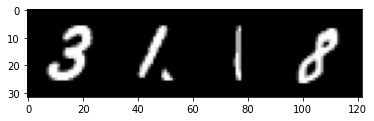

    3     1     1     8


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
model = LeNet1().to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.471
[1,  4000] loss: 1.107
[1,  6000] loss: 1.055


KeyboardInterrupt: 

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
